In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

CS273P_Final_Project.ipynb cnn_model.h5
archive


In [4]:
train_df = pd.read_csv("archive/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("archive/sign_mnist_test/sign_mnist_test.csv")

In [5]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [7]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [8]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# Reshape the images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
y_train.shape

(27455,)

Text(0.5, 1.0, 'Number of each label for train data')

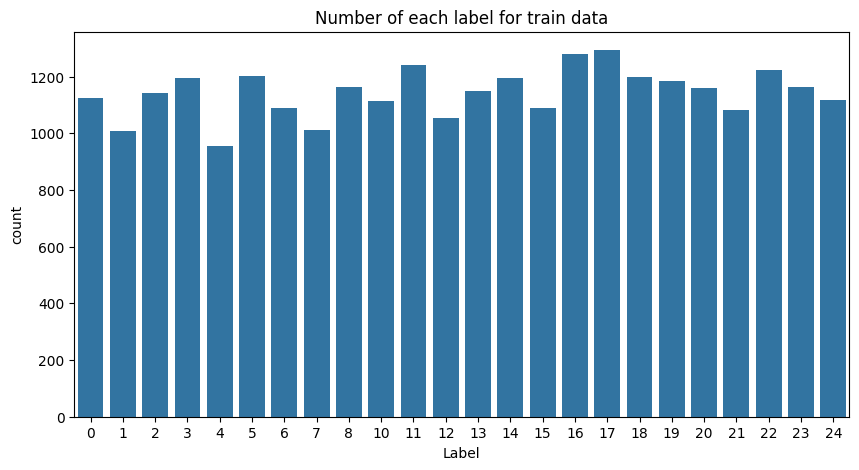

In [41]:
# Plot the distribution of labels in the training set
plt.figure(figsize = (10,5))
sns.countplot(x = y_train)
plt.xlabel("Label")
plt.title("Number of each label for train data")

Text(0.5, 1.0, 'Number of each label for test data')

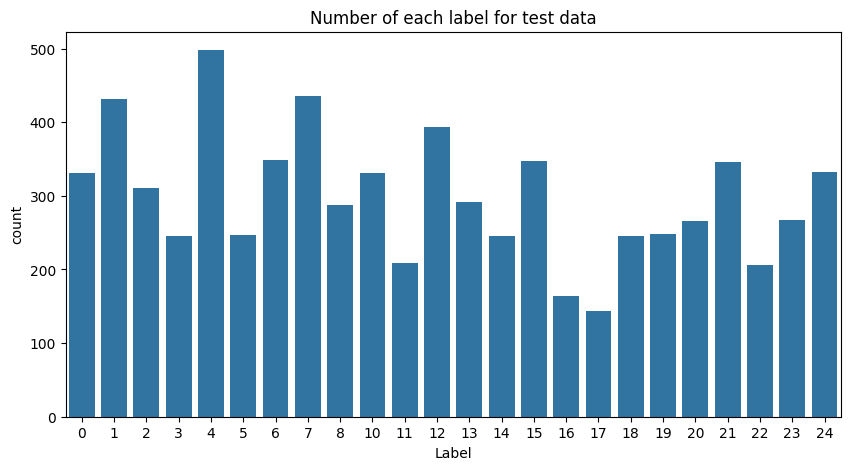

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(x = y_test)
plt.xlabel("Label")
plt.title("Number of each label for test data")

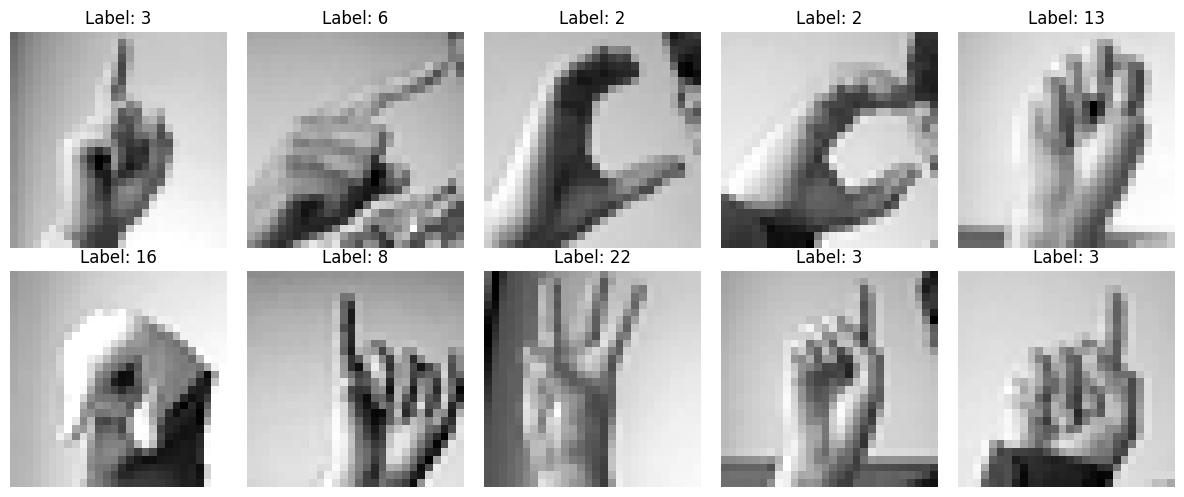

In [12]:
def plot_images(images, labels, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5))
    axes = axes.flatten()
    for img, lbl, ax in zip(images, labels, axes):
        ax.imshow(img.squeeze(), cmap='gray') # Images are squeezed to remove single-dimensional entries from the shape
        ax.set_title(f'Label: {lbl}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot a few images from the training set
plot_images(X_train[:10], y_train[:10])

In [36]:
len(np.unique(y_train))

24

In [37]:
unique_labels, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count} samples")

Label 0: 1126 samples
Label 1: 1010 samples
Label 2: 1144 samples
Label 3: 1196 samples
Label 4: 957 samples
Label 5: 1204 samples
Label 6: 1090 samples
Label 7: 1013 samples
Label 8: 1162 samples
Label 10: 1114 samples
Label 11: 1241 samples
Label 12: 1055 samples
Label 13: 1151 samples
Label 14: 1196 samples
Label 15: 1088 samples
Label 16: 1279 samples
Label 17: 1294 samples
Label 18: 1199 samples
Label 19: 1186 samples
Label 20: 1161 samples
Label 21: 1082 samples
Label 22: 1225 samples
Label 23: 1164 samples
Label 24: 1118 samples


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

/Users/chuqiwang/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## CNN with dropout=0.5 with ReLU

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [26]:
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_test, y_test_encoded))

Epoch 1/20
858/858 [==============================] - 6s 6ms/step - loss: 1.4599 - accuracy: 0.5446 - val_loss: 0.5100 - val_accuracy: 0.8436
Epoch 2/20
858/858 [==============================] - 5s 6ms/step - loss: 0.4396 - accuracy: 0.8490 - val_loss: 0.2924 - val_accuracy: 0.9091
Epoch 3/20
858/858 [==============================] - 5s 6ms/step - loss: 0.2341 - accuracy: 0.9197 - val_loss: 0.2595 - val_accuracy: 0.9207
Epoch 4/20
858/858 [==============================] - 6s 6ms/step - loss: 0.1588 - accuracy: 0.9456 - val_loss: 0.2670 - val_accuracy: 0.9147
Epoch 5/20
858/858 [==============================] - 5s 6ms/step - loss: 0.1176 - accuracy: 0.9589 - val_loss: 0.2363 - val_accuracy: 0.9328
Epoch 6/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0980 - accuracy: 0.9654 - val_loss: 0.2520 - val_accuracy: 0.9228
Epoch 7/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0876 - accuracy: 0.9683 - val_loss: 0.2334 - val_accuracy: 0.9310
Epoch 

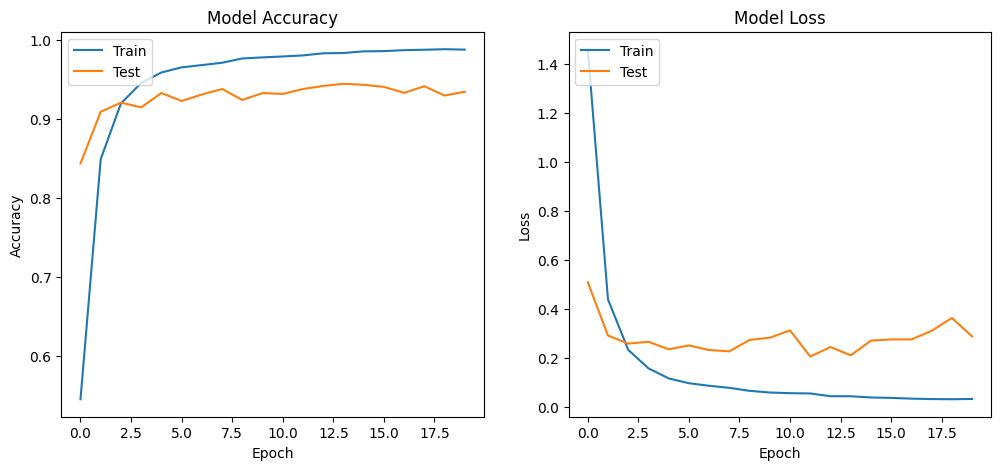

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 0s - loss: 0.2889 - accuracy: 0.9345 - 401ms/epoch - 2ms/step
Test accuracy: 0.9344673752784729, Test loss: 0.28893566131591797


## CNN without dropout

In [43]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [44]:
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_test, y_test_encoded))

Epoch 1/20
858/858 [==============================] - 5s 6ms/step - loss: 0.8518 - accuracy: 0.7461 - val_loss: 0.4852 - val_accuracy: 0.8476
Epoch 2/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0406 - accuracy: 0.9936 - val_loss: 0.3689 - val_accuracy: 0.9024
Epoch 3/20
858/858 [==============================] - 6s 6ms/step - loss: 0.0178 - accuracy: 0.9961 - val_loss: 0.4199 - val_accuracy: 0.8734
Epoch 4/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.3876 - val_accuracy: 0.9142
Epoch 5/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.6971 - val_accuracy: 0.8263
Epoch 6/20
858/858 [==============================] - 5s 6ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.4303 - val_accuracy: 0.9066
Epoch 7/20
858/858 [==============================] - 5s 6ms/step - loss: 3.3601e-04 - accuracy: 1.0000 - val_loss: 0.4450 - val_accuracy: 0.9067
Ep

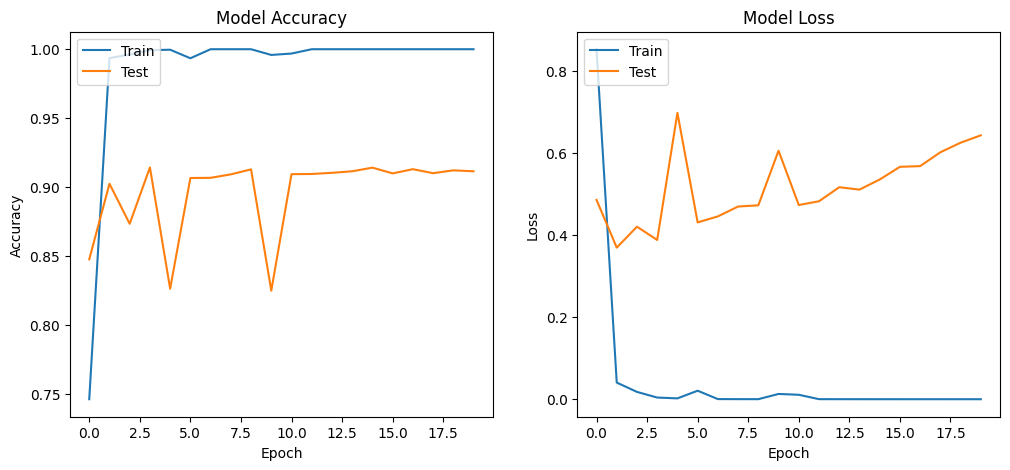

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 0s - loss: 0.6423 - accuracy: 0.9115 - 420ms/epoch - 2ms/step
Test accuracy: 0.9114612340927124, Test loss: 0.6422750353813171


In [63]:
model = Sequential([
    Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='sigmoid'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

In [66]:
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_test, y_test_encoded))

Epoch 1/20
858/858 [==============================] - 6s 7ms/step - loss: 0.4542 - accuracy: 0.8703 - val_loss: 0.4685 - val_accuracy: 0.8742
Epoch 2/20
858/858 [==============================] - 6s 7ms/step - loss: 0.2813 - accuracy: 0.9257 - val_loss: 0.3615 - val_accuracy: 0.8979
Epoch 3/20
858/858 [==============================] - 6s 7ms/step - loss: 0.1863 - accuracy: 0.9527 - val_loss: 0.3014 - val_accuracy: 0.9119
Epoch 4/20
858/858 [==============================] - 6s 7ms/step - loss: 0.1241 - accuracy: 0.9717 - val_loss: 0.2905 - val_accuracy: 0.9083
Epoch 5/20
858/858 [==============================] - 6s 7ms/step - loss: 0.0889 - accuracy: 0.9801 - val_loss: 0.2561 - val_accuracy: 0.9156
Epoch 6/20
858/858 [==============================] - 6s 7ms/step - loss: 0.0689 - accuracy: 0.9839 - val_loss: 0.2461 - val_accuracy: 0.9214
Epoch 7/20
858/858 [==============================] - 6s 7ms/step - loss: 0.0498 - accuracy: 0.9903 - val_loss: 0.2433 - val_accuracy: 0.9311
Epoch 

In [65]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 0s - loss: 0.6502 - accuracy: 0.8093 - 478ms/epoch - 2ms/step
Test accuracy: 0.809258222579956, Test loss: 0.650194525718689


In [19]:
# from tensorflow.keras.models import load_model
# model.save('cnn_model.h5')

/Users/chuqiwang/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# import cv2
# import numpy as np

# # Load the trained model
# model = load_model('cnn_model.h5')

# # Start video capture
# cap = cv2.VideoCapture(0)  # 0 is typically the default camera

# while True:
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     if not ret:
#         break

#     # Convert the image to grayscale
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Resize the image to match the model's expected input size
#     resized = cv2.resize(gray, (28, 28))

#     # Normalize the pixel values (if your model expects values between 0 and 1)
#     normalized = resized / 255.0

#     # Expand dimensions to represent the batch size
#     normalized = np.expand_dims(normalized, axis=[0, -1])

#     # Predict the class
#     prediction = model.predict(normalized)
#     predicted_class = np.argmax(prediction, axis=1)

#     # Display the resulting frame with predicted class
#     cv2.putText(frame, 
#                 f'Predicted Class: {predicted_class}', 
#                 (50, 50), 
#                 cv2.FONT_HERSHEY_SIMPLEX, 
#                 1, 
#                 (0, 255, 0), 
#                 2, 
#                 cv2.LINE_AA)
#     cv2.imshow('frame', frame)

#     # Break the loop with the 'q' key
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # When everything is done, release the capture
# cap.release()
# cv2.destroyAllWindows()


2024-03-22 14:46:33.290 python[65866:11269012] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
